Support code set-up

In [1]:
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import PIL

In [2]:
%%capture
!pip install efficientnet_pytorch
from efficientnet_pytorch import EfficientNet

In [3]:
class GalaxyNetDataset(Dataset):
  def __init__(self):
    self.soln = np.genfromtxt('sample_solutions.csv', delimiter=',', dtype=np.float)
    self.transform = transforms.ToTensor()

  def __getitem__(self, idx):
    img_name = 'samples/' + str(int(self.soln[idx, 0])) + ".jpg"
    img = self.transform(PIL.Image.open(img_name))
    classification = self.soln[idx, 1:]
    return img, classification

Reconstruct and load model from disk

In [4]:
from src.pytorch_preprocess import NormalizeImages

model = torch.load('effnet.pt')
dataset = GalaxyNetDataset()
data_loader = DataLoader(dataset)

In consideration of limiting the upload size, we only randomly selected 100 images to accompany the project report.

Randomly display an image among the 100 examples, its classification and predictions, and its MSE.

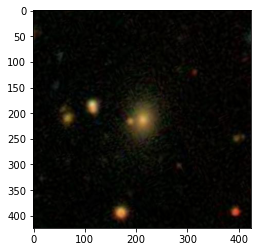

Galaxy id 958094
Overall MSE=0.020860212854939553
Label		Truth		Prediction	Error
Class1.1	0.833224	0.463396	0.369828
Class1.2	0.128460	0.460812	0.332352
Class1.3	0.038317	0.043677	0.005360
Class2.1	0.000000	0.360000	0.360000
Class2.2	0.128460	0.101417	0.027043
Class3.1	0.000000	0.025145	0.025145
Class3.2	0.128460	0.070372	0.058088
Class4.1	0.000000	-0.015179	0.015179
Class4.2	0.128460	0.106348	0.022112
Class5.1	0.000000	0.071782	0.071782
Class5.2	0.063365	0.004788	0.058577
Class5.3	0.041725	0.014456	0.027269
Class5.4	0.023370	0.011993	0.011377
Class6.1	0.274457	0.268947	0.005510
Class6.2	0.725543	0.714354	0.011189
Class7.1	0.136510	0.125956	0.010554
Class7.2	0.696714	0.172614	0.524100
Class7.3	0.000000	0.167458	0.167458
Class8.1	0.000000	-0.002336	0.002336
Class8.2	0.000000	0.011729	0.011729
Class8.3	0.000000	0.028395	0.028395
Class8.4	0.000000	0.059693	0.059693
Class8.5	0.082337	0.097969	0.015632
Class8.6	0.192120	0.066539	0.125581
Class8.7	0.000000	0.012598	0.012598
Class9.1	0.000000

In [5]:
import matplotlib.pyplot as plt

example_idx = np.random.default_rng().choice(np.arange(dataset.soln.shape[0]))

model.eval()
image, truth = dataset[example_idx]
predictions = model(image.reshape((1, *image.shape)).type(torch.cuda.FloatTensor))

mse = np.mean(np.square(truth - predictions[0].cpu().detach().numpy()))

plt.imshow(image.numpy().transpose(1, 2, 0))
plt.show()
print('Galaxy id ' + str(int(dataset.soln[example_idx, 0])))
print('Overall MSE=' + str(mse))
print('Label\t\tTruth\t\tPrediction\tError')
for i, label in enumerate([
    'Class1.1','Class1.2','Class1.3',
    'Class2.1','Class2.2',
    'Class3.1','Class3.2',
    'Class4.1','Class4.2',
    'Class5.1','Class5.2','Class5.3','Class5.4',
    'Class6.1','Class6.2',
    'Class7.1','Class7.2','Class7.3',
    'Class8.1','Class8.2','Class8.3','Class8.4','Class8.5','Class8.6','Class8.7',
    'Class9.1','Class9.2','Class9.3',
    'Class10.1','Class10.2','Class10.3',
    'Class11.1','Class11.2','Class11.3','Class11.4','Class11.5','Class11.6'
]):
    print('{}\t{:.6f}\t{:.6f}\t{:.6f}'.format(
        label,
        truth[i],
        predictions[0, i].item(),
        np.abs(truth[i] - predictions[0, i].item())
    ))
